<a href="https://colab.research.google.com/github/widyasitopu/games-sales/blob/main/Games_Sales_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1pvgIf5G6_M-ReNSHqMcnoMfQxcZrDzzjTqMomfTIQvE/edit#gid=2094679213'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1pvgIf5G6_M-ReNSHqMcnoMfQxcZrDzzjTqMomfTIQvE/export?format=csv&gid=2094679213


In [3]:
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Data Preparation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [10]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [11]:
df_cleaned = df.copy()

df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [6]:
df_cleaned['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [7]:
for col_name in ['Series', 'Genre', 'Developer', 'Publisher']:
  print(df_cleaned[col_name].value_counts(), '\n')

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64 

Blizzard Entertainment             10
Maxis                               6
Paradox Development Studio          5
id Software  

In [12]:
df_cleaned['Name'].duplicated().sum()

2

In [14]:
df_cleaned[df_cleaned.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [16]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()

0

In [17]:
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


Duplikasi tidak ada lagi karna sebelumnya di spreadsheet telah dilakukan proses remove duplicate sekaligus pengisian data yang kosong di Series menjadi 'Tidak Diketahui'. Walaupun ada pola dari Name ke Series dimana akhir dari Names menjadi isian Series, saya tidak bisa mengikuti pola tersebut karena adanya confirmation bias. Jadi saya tetap mengisinya dengan isian "Tidak Diketahui".

# Explanatory Data Analysis

## Data Analysis

In [ ]:
# The oldest and the newest game
games_sorted = df_cleaned.sort_values(by=['Release'])

oldest_game = games_sorted.iloc[0]
newest_game = games_sorted.iloc[-1]

oldest_date = oldest_game['Release'].to_pydatetime().strftime('%d-%m-%Y')
newest_date = newest_game['Release'].to_pydatetime().strftime('%d-%m-%Y')

print("The oldest game in Game Sales dataset is : ", oldest_game['Name'], '(' + oldest_date + ')')
print("The newest game in Game Sales dataset is : ", newest_game['Name'], '(' + newest_date + ')')

The oldest game in Game Sales dataset is :  Hydlide (01-12-1984)
The newest game in Game Sales dataset is :  Valheim (01-02-2021)


In [ ]:
# Publisher who published most of the games
games_by_publisher = df_cleaned.groupby('Publisher')
game_counts = games_by_publisher['Name'].count()

most_games = game_counts.idxmax()
print("Publisher who published most of the games is : ", most_games, "\nwith many published games : ", game_counts.loc[most_games])

Publisher who published most of the games is :  Electronic Arts 
with many published games :  19


In [ ]:
# Developer who developed most of the games
games_by_developer = df_cleaned.groupby('Developer')
game_counts = games_by_developer['Name'].count()

most_games = game_counts.idxmax()
print("Developer who developed most of the games is : ", most_games, "\nwith many published games : ", game_counts.loc[most_games])

Developer who developed most of the games is :  Blizzard Entertainment 
with many published games :  8


In [ ]:
# Series is the most sales
sales_by_series = df_cleaned.groupby('Series')
sales_sum = sales_by_series['Sales'].sum()

most_sales = sales_sum.idxmax()
print("Series which the most sales is : ", most_sales, "\nwith sales : ", sales_sum.loc[most_sales], "(in millions)")

Series which the most sales is :  Tidak Diketahui 
with sales :  156.1 (in millions)


In [ ]:
# Series have the most games
games_by_series = df_cleaned.groupby('Series')
game_count = games_by_series['Name'].count()

most_games = game_count.idxmax()
print("Series who have the most games is : ", most_games, "\n with many games : ", game_count.loc[most_games])

Series who have the most games is :  Tidak Diketahui 
 with many games :  36


## Data Visualization

In [ ]:
df_daily = df_cleaned.groupby('Release', as_index=False).sum()
df_daily.head()

,Release,Sales
0,1984-12-01,1.0
1,1985-06-01,4.0
2,1985-11-01,1.5
3,1988-01-01,1.0
4,1988-08-01,5.5


In [ ]:
df_cleaned.reset_index()

,index,Name,Sales,Series,Release,Genre,Developer,Publisher
0,0,PlayerUnknown's Battlegrounds,42.0,Tidak Diketahui,2017-12-01,Battle royale,PUBG Studios,Krafton
1,1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,3,Garry's Mod,20.0,Tidak Diketahui,2006-11-01,Sandbox,Facepunch Studios,Valve
4,4,Terraria,17.2,Tidak Diketahui,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...,...
170,170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,172,Who Wants to Be a Millionaire?,1.0,Tidak Diketahui,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


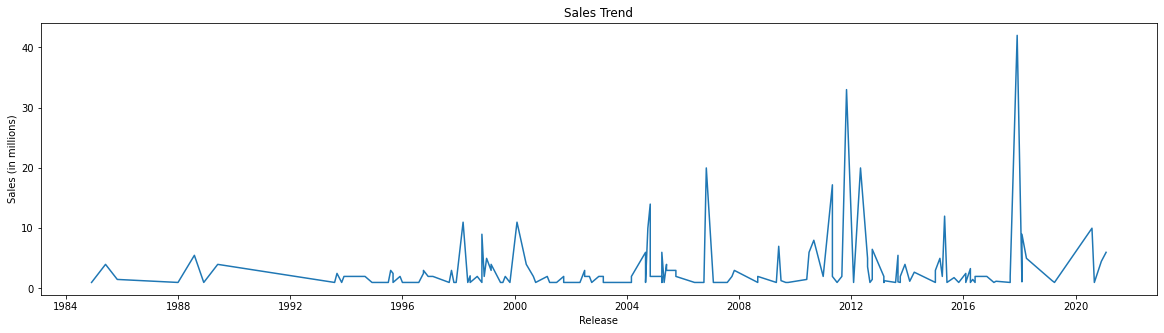

In [ ]:
# Visualization of sales per release time
df_cleaned = df_cleaned.sort_values('Release')
plt.rcParams['figure.figsize'] = (20,5)

plt.plot('Release', 'Sales', data=df_cleaned)
plt.title('Sales Trend')
plt.xlabel('Release')
plt.ylabel('Sales (in millions)')
plt.show()

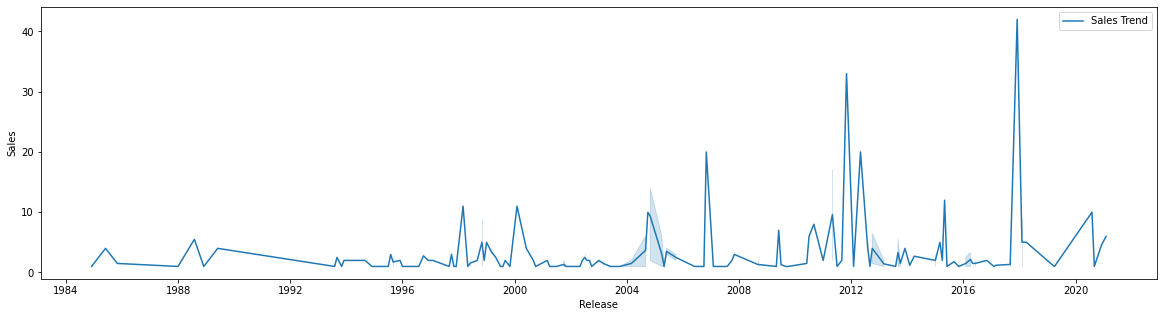

In [ ]:
# Visualization of sales per release time
sns.lineplot(data = df_cleaned, x = 'Release', y ='Sales', label = 'Sales Trend')

In [ ]:
df_publisher = df_cleaned.groupby('Publisher', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
df_publisher.head()

,Publisher,Sales,Name
0,2K Games,1.0,1
1,2K Games & Aspyr,11.0,2
2,Activision,13.5,6
3,Amanita Design,1.0,1
4,"Atari, Inc",2.0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


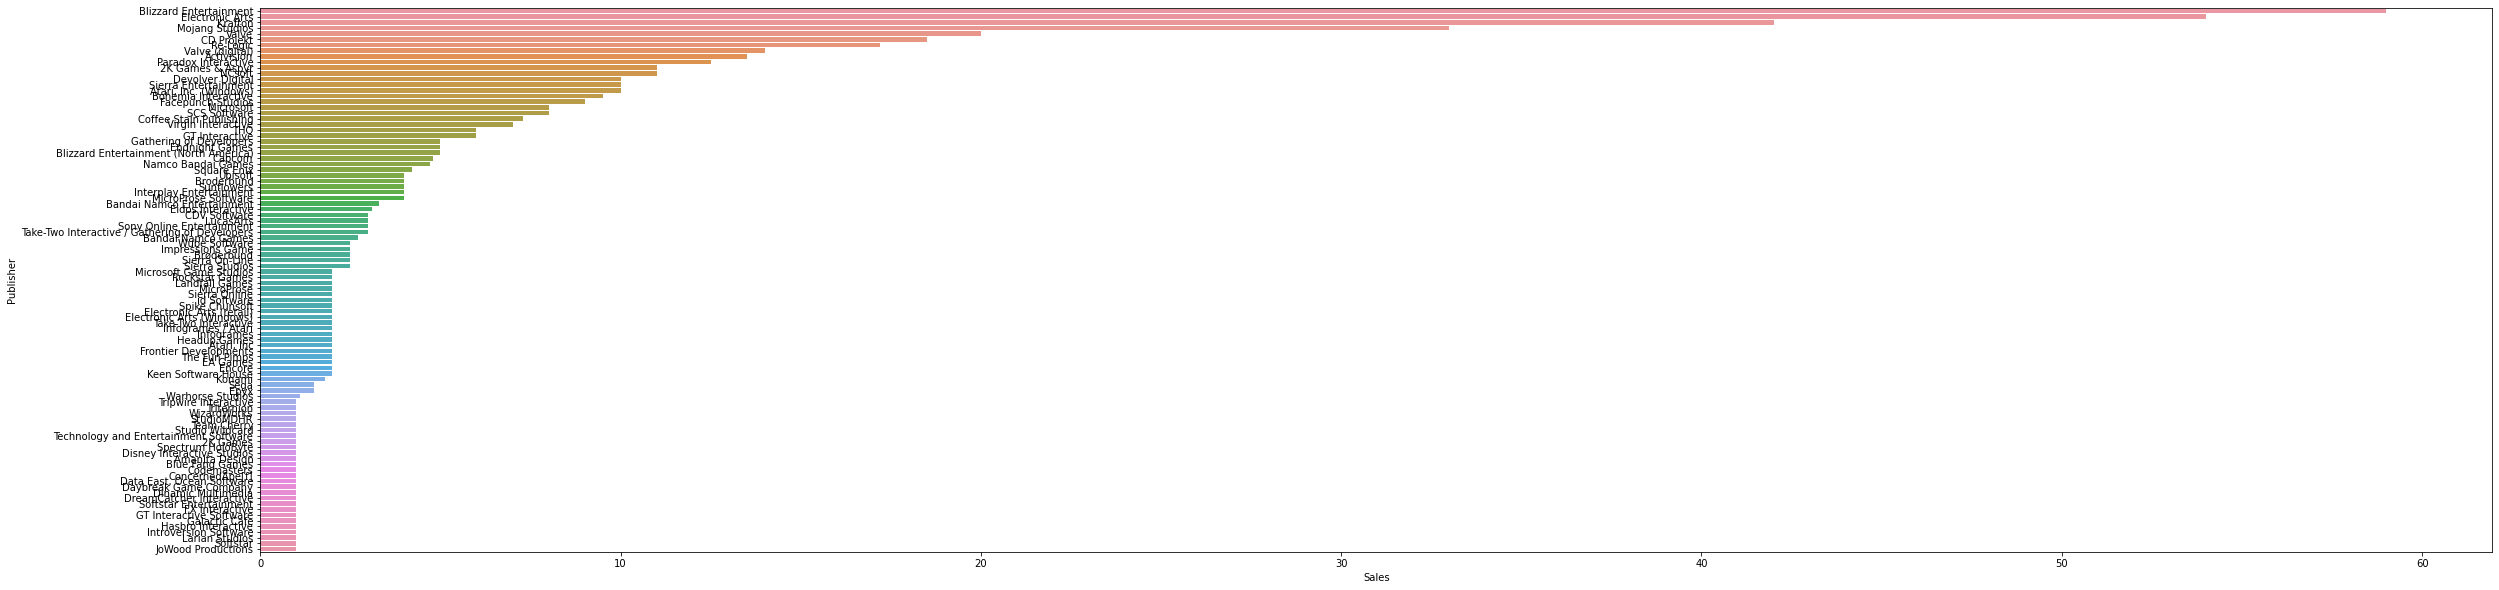

In [ ]:
# Visualization of sales per publisher
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Sales', 'Publisher', data = df_publisher.sort_values('Sales', ascending=False))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


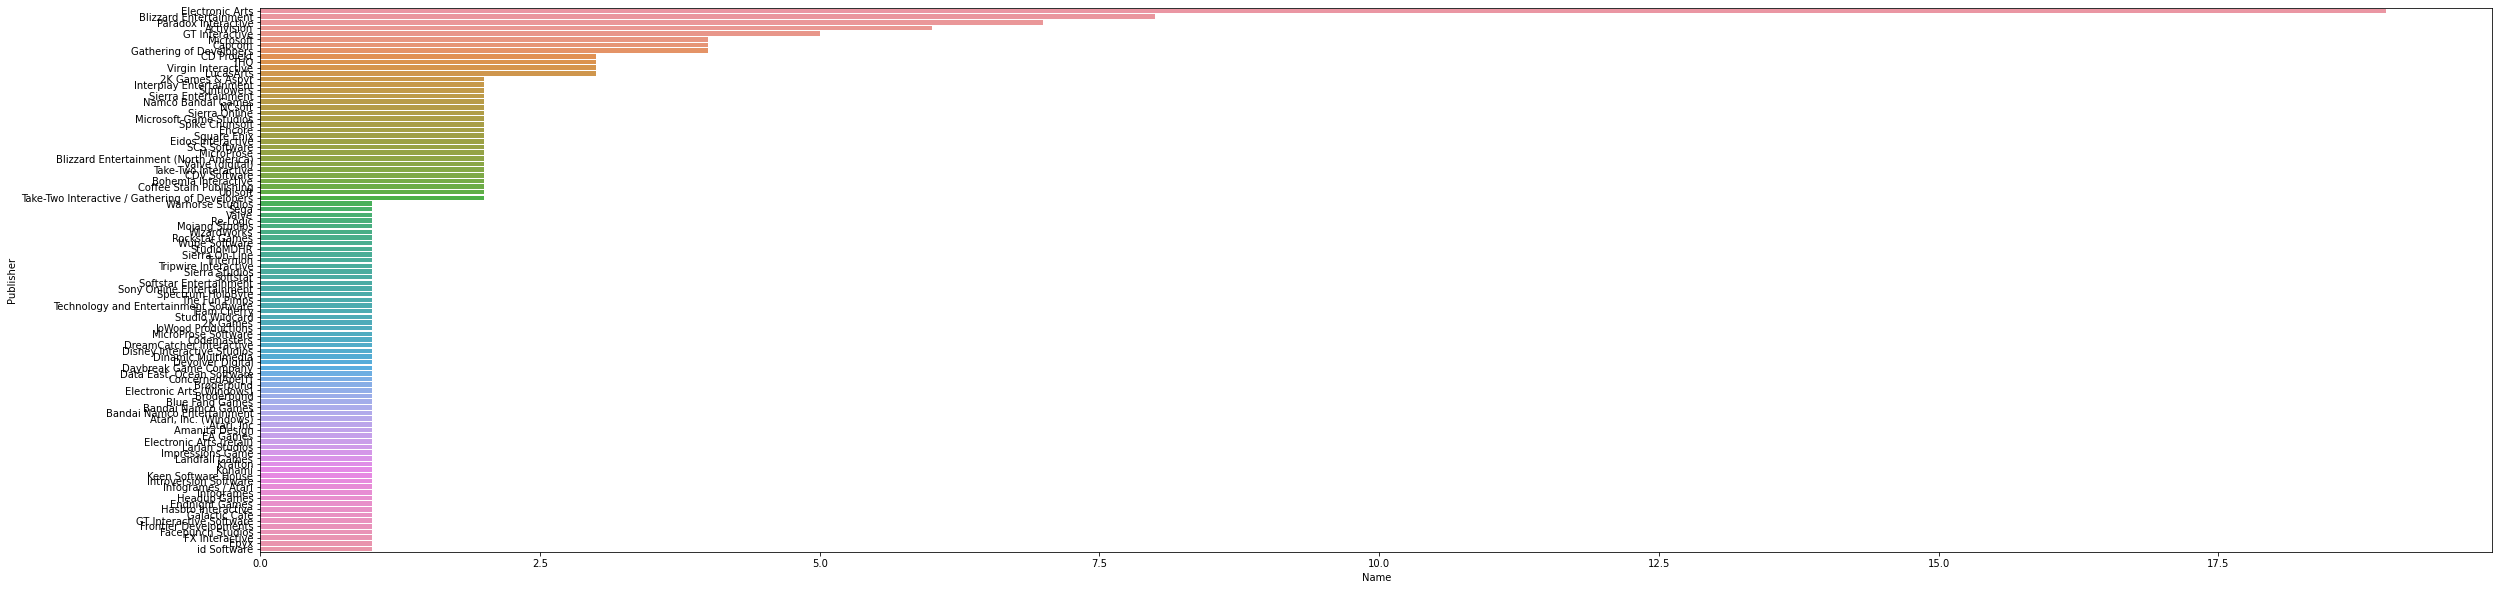

In [ ]:
# Visualization of publisher who published most of the games
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Name', 'Publisher', data = df_publisher.sort_values('Name', ascending=False))

In [ ]:
df_developer = df_cleaned.groupby('Developer', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
df_developer.head()

,Developer,Sales,Name
0,3D Realms,1.0,1
1,Amanita Design,1.0,1
2,ArenaNet,11.0,2
3,Arrowhead Game Studios,2.0,1
4,Ascaron,2.0,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


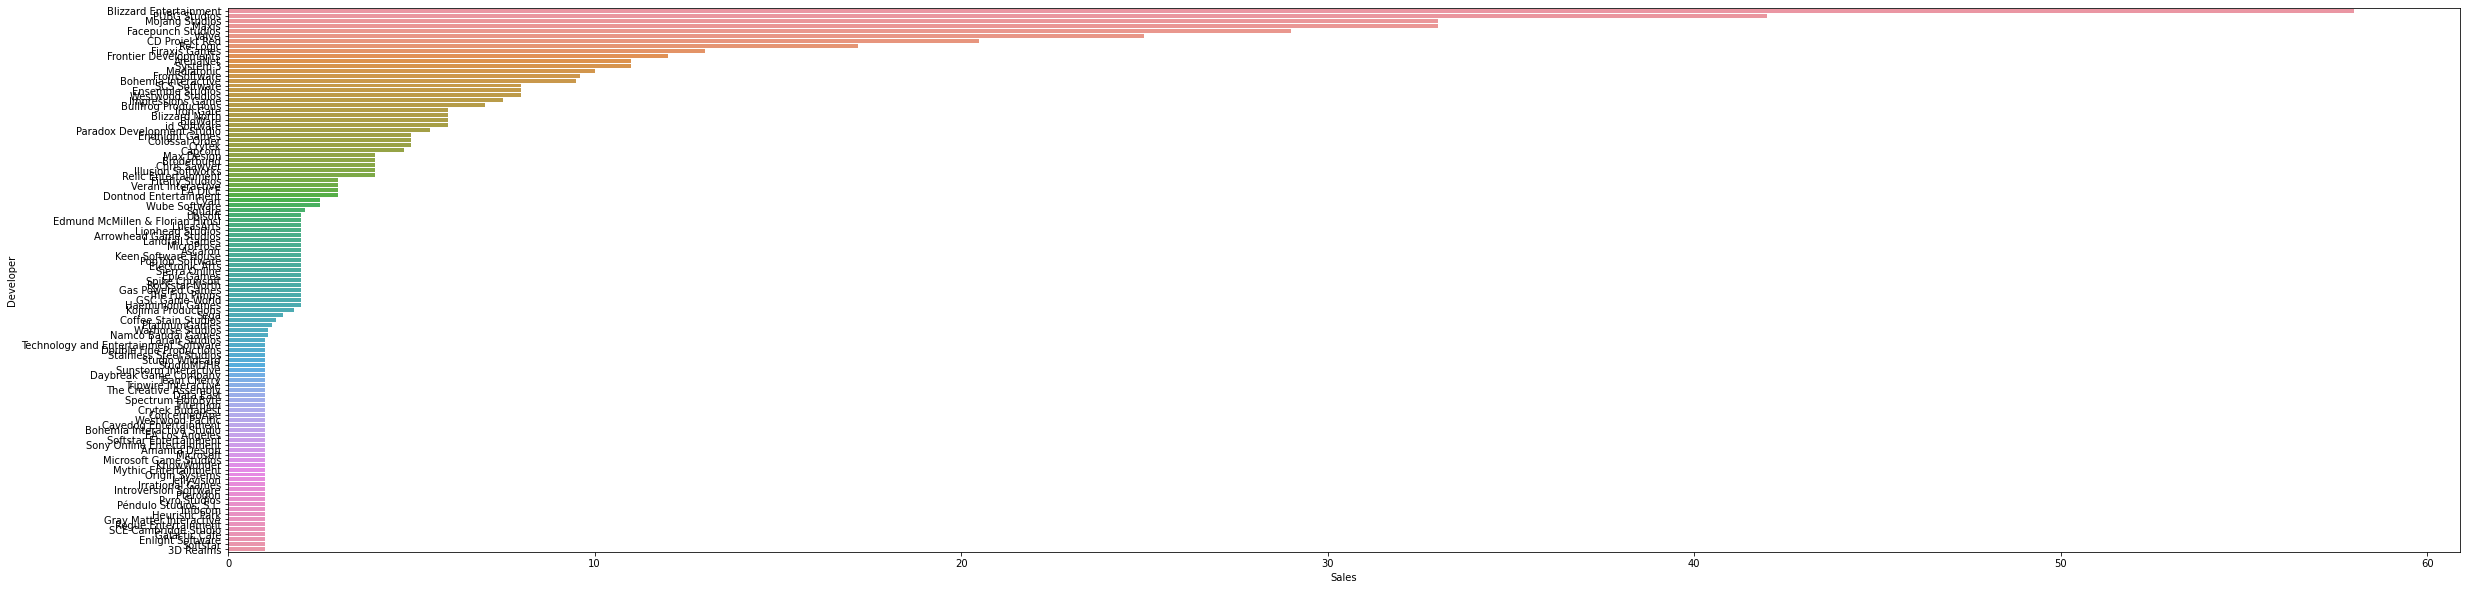

In [ ]:
# Visualization of sales per developer
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Sales', 'Developer', data = df_developer.sort_values('Sales', ascending=False))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


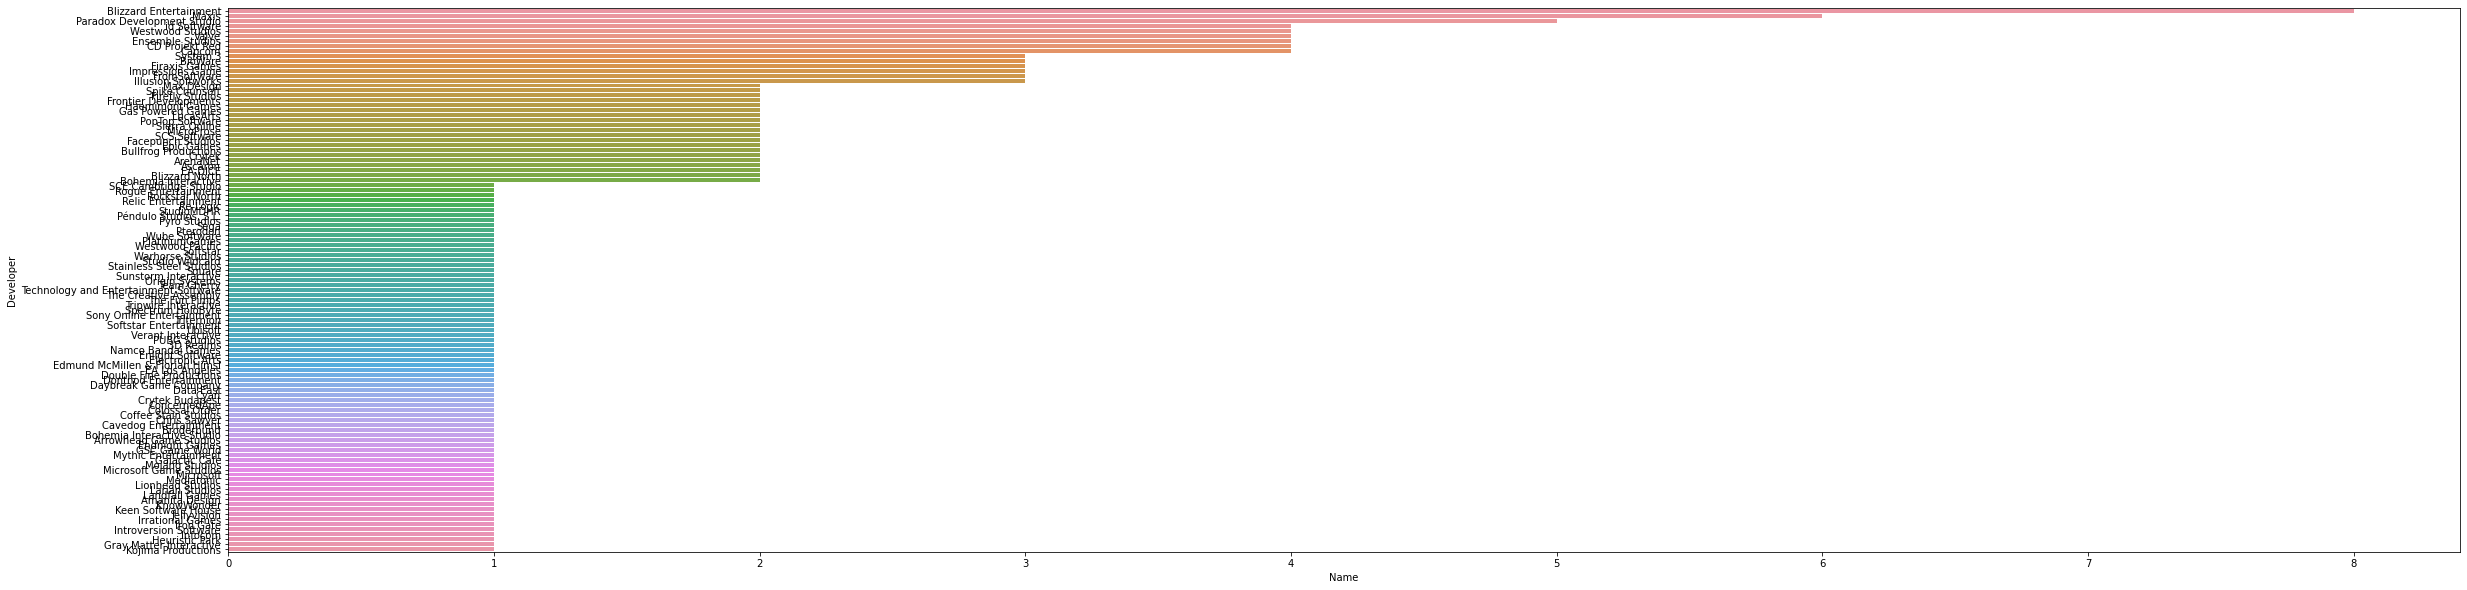

In [ ]:
# Visualization of developer who developed most of the games
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Name', 'Developer', data = df_developer.sort_values('Name', ascending=False))

In [ ]:
df_series = df_cleaned.groupby('Series', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
df_series.head()

,Series,Sales,Name
0,7 Days,2.0,1
1,ARMA,5.5,1
2,Age of Empires,8.0,4
3,Alice,1.0,1
4,Anno,4.0,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


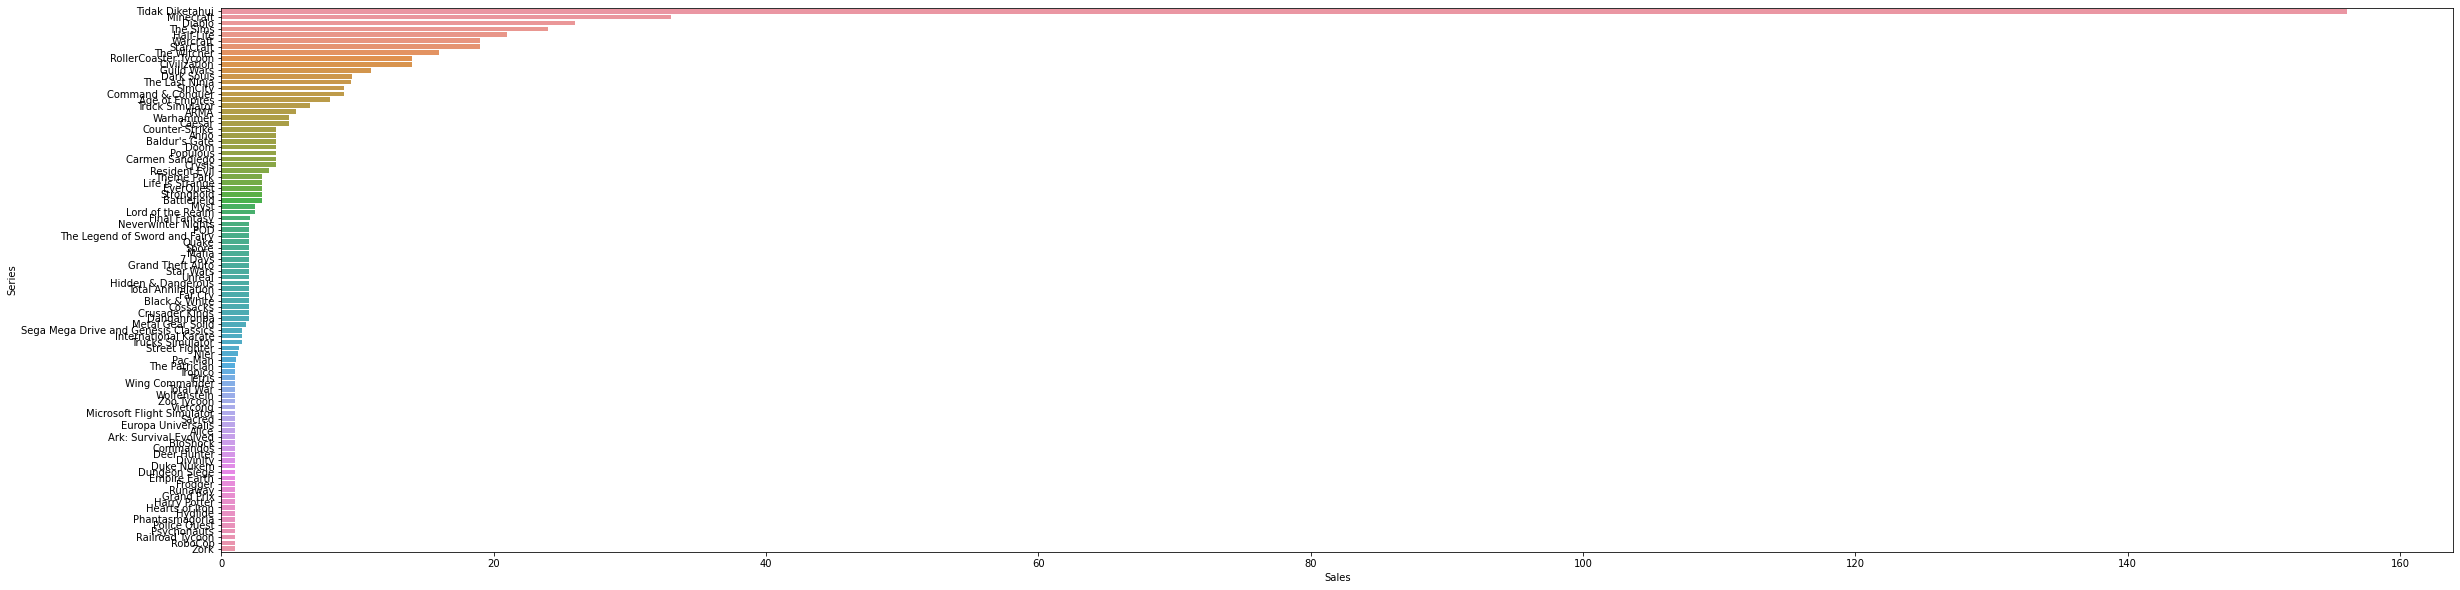

In [ ]:
# Visualization of sales per series
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Sales', 'Series', data = df_series.sort_values('Sales', ascending=False))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


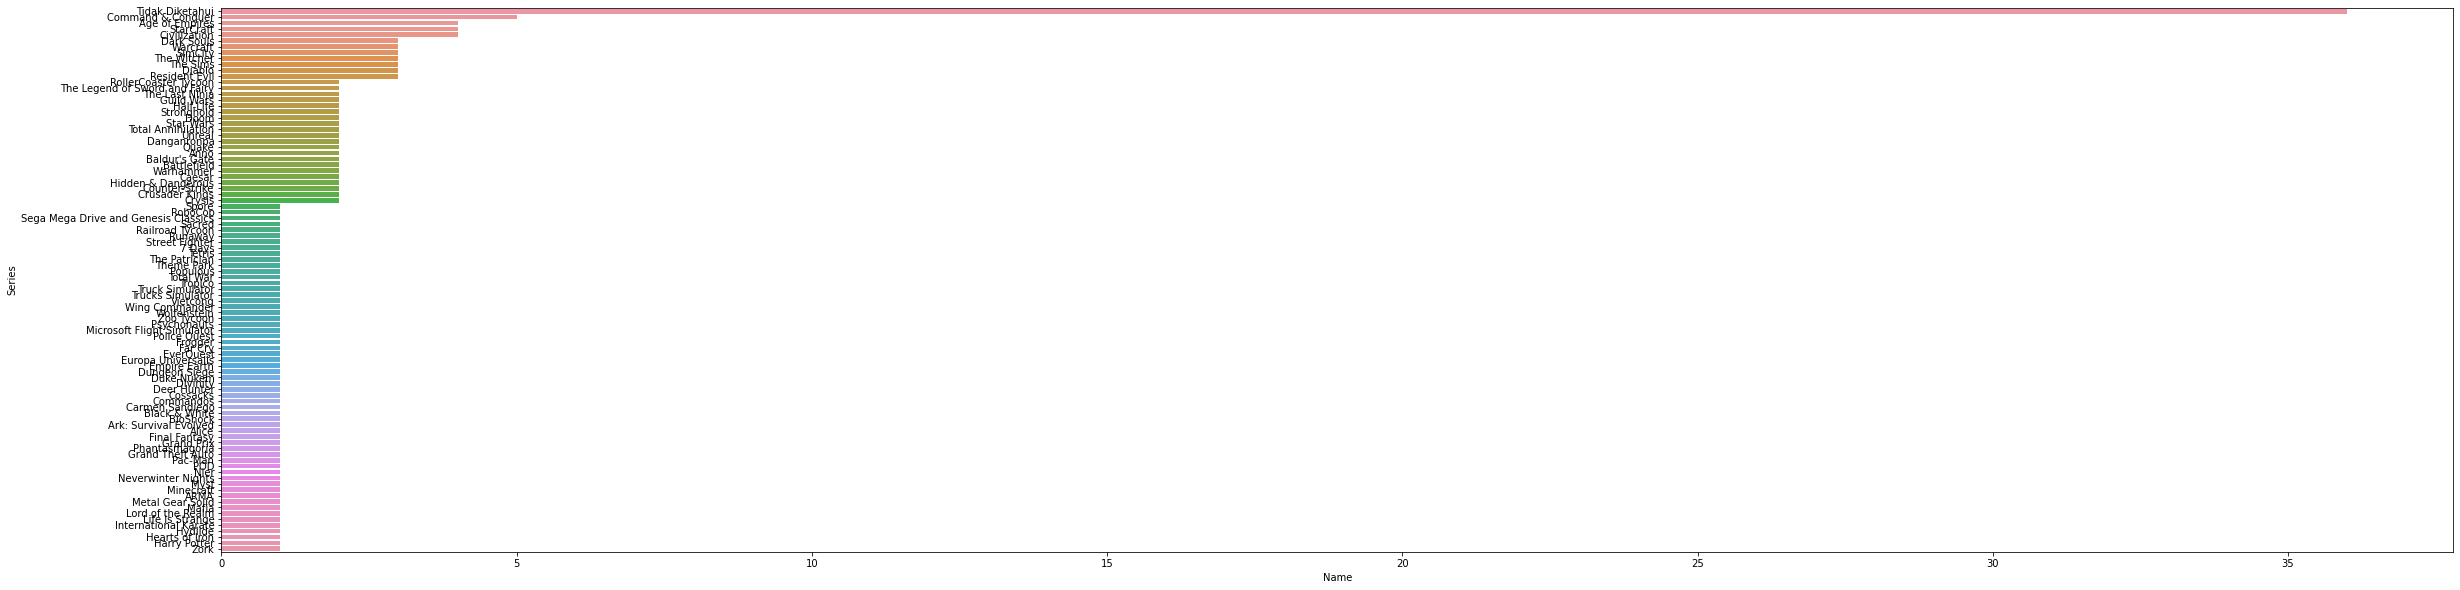

In [ ]:
# Visualization of series who have most of the games
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Name', 'Series', data = df_series.sort_values('Name', ascending=False))

In [ ]:
df_genre = df_cleaned.groupby('Genre', as_index=False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
df_genre.head()

,Genre,Sales,Name
0,Action,4.0,4
1,Action role-playing,58.1,12
2,Action role-playing game,1.1,1
3,"Action role-playing, hack and slash",1.2,1
4,Action-adventure,31.7,6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


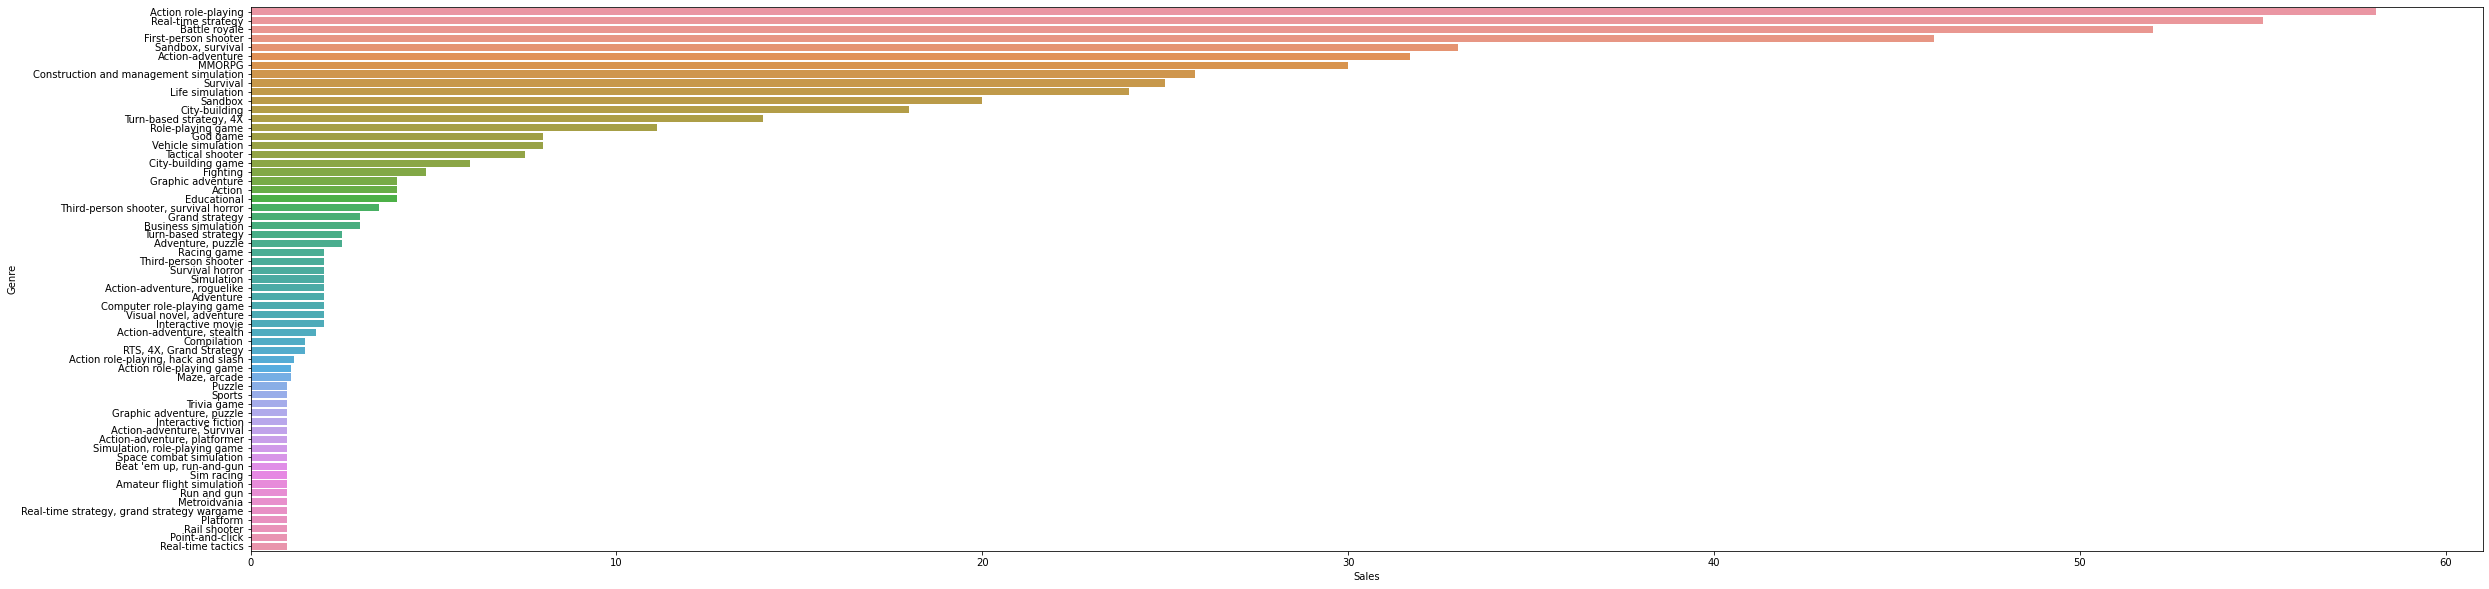

In [ ]:
# Visualization of sales per genre
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Sales', 'Genre', data = df_genre.sort_values('Sales', ascending=False))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


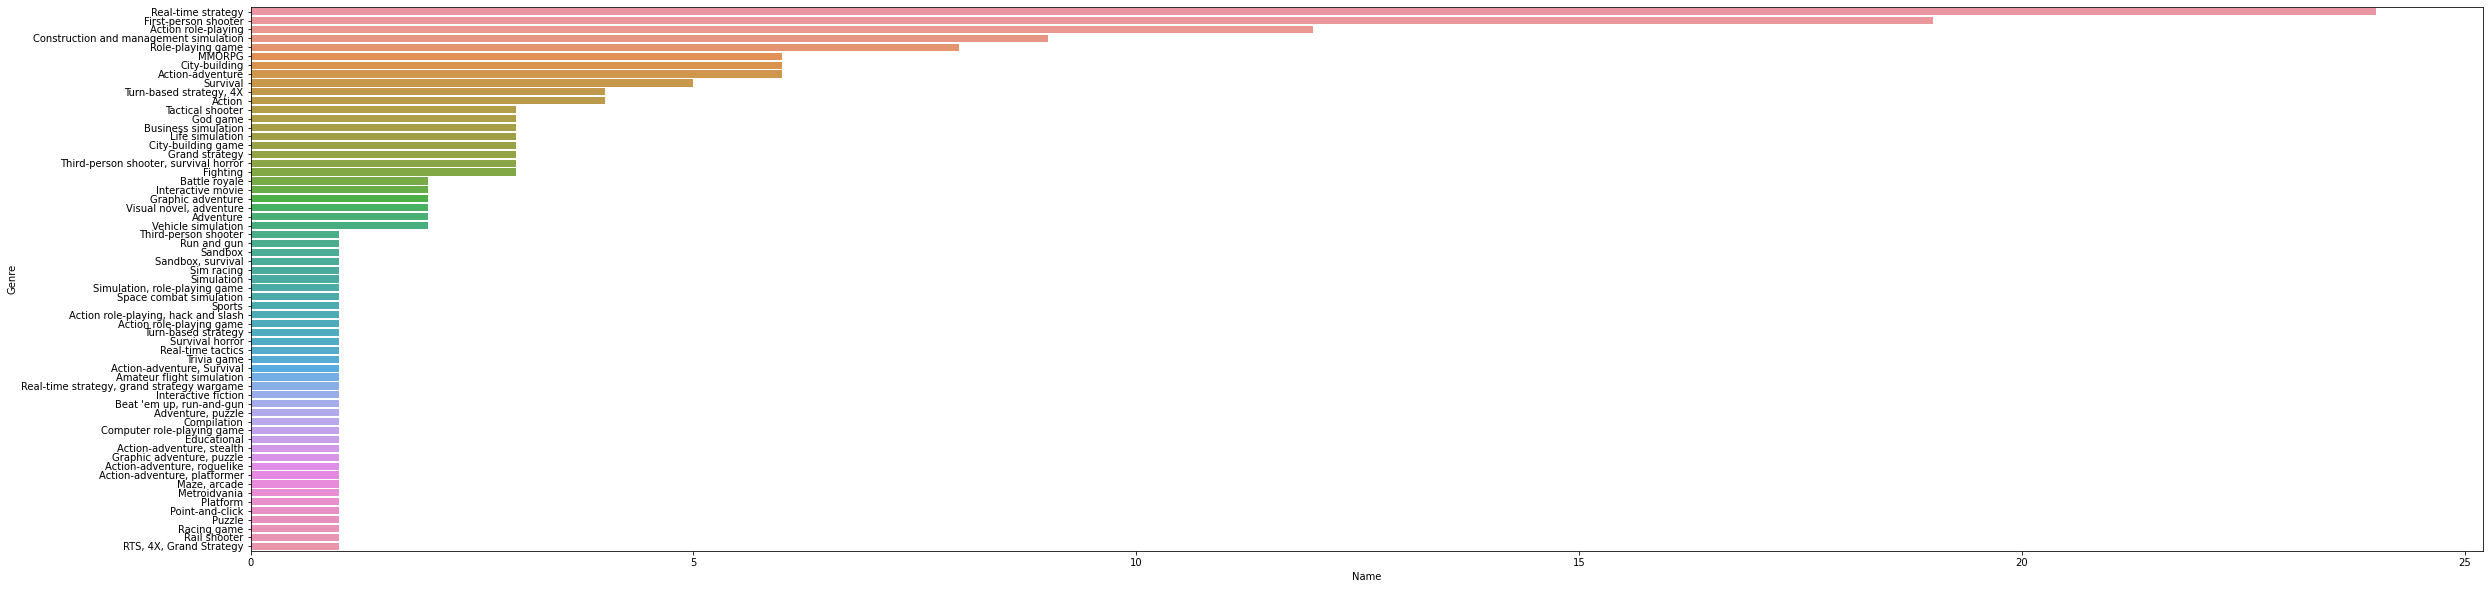

In [ ]:
# Visualization of genre who have most of the games
plt.rcParams['figure.figsize'] = (40,10)
sns.barplot('Name', 'Genre', data = df_genre.sort_values('Name', ascending=False))